#                          Heart Disease Prediction Using Machine Learning

### Importing the Libraries 

In [60]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [61]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Taking Care of Null Values

In [62]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

* Since all the values is zero, which means that dataset doesn't contain any null value.

### Taking Care of Duplicate Values

In [63]:
data_dup = data.duplicated().any()
data_dup

True

* Since the Output is True,So the Dataset contains Duplicate values and we have to remove it.

In [64]:
data = data.drop_duplicates()

In [65]:
data.shape

(302, 14)

In [7]:
data_dup = data.duplicated().any()
data_dup

False

Dataset free from duplicate values.

### Data Processing

In [8]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [9]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Encoding Categorical Data

In [11]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [13]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first = True)

### Feature Scaling

In [14]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
st = StandardScaler() 
data[cont_val] = st.fit_transform(data[cont_val])

In [90]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Splitting The Dataset Into The Training Set And Test Set

In [17]:
# independent Variables
x = data.drop('target',axis = 1)

In [18]:
#dependent Variable
y = data['target']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,0,0,0,1,...,1,1,0,0,1,0,0,1,0,0
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [23]:
X_test = np.array(X_test)
X_test

array([[-1.15360966,  1.        , -0.09140084, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.83908882,  0.        , -0.09140084, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.39626693,  0.        ,  2.18984329, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.26796589,  1.        , -0.20546305, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.2819107 ,  1.        ,  1.61953226, ...,  1.        ,
         0.        ,  0.        ],
       [-2.1499589 ,  0.        ,  0.36484799, ...,  0.        ,
         1.        ,  0.        ]])

## Since target variable is Categorical contains 2 values(0 & 1) So, this is a Classification type problem.From here we use different classification algorithm & we will evaluate there performance based on accuracy and find the best model fit for the dataset.

In [24]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [27]:
X_test

array([[-1.15360966,  1.        , -0.09140084, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.83908882,  0.        , -0.09140084, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.39626693,  0.        ,  2.18984329, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.26796589,  1.        , -0.20546305, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.2819107 ,  1.        ,  1.61953226, ...,  1.        ,
         0.        ,  0.        ],
       [-2.1499589 ,  0.        ,  0.36484799, ...,  0.        ,
         1.        ,  0.        ]])

In [28]:
y_pred1 = log.predict(X_test)
y_pred1

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

LogisticRegression is around 78.6% accurate

### Support Vector Classifier(SVC)

In [31]:
from sklearn import svm

In [32]:
svm = svm.SVC()

In [33]:
svm.fit(X_train,y_train)

SVC()

In [34]:
# All the predicted values are available in Y_pred2
y_pred2 = svm.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

SVC is around 80.3% accurate on this particular dataset.

### KNeighbors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
y_pred3 = knn.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [41]:
score = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(np.array(X_test))
    score.append(accuracy_score(y_test,y_pred))

In [42]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

KNN model will provide more accurate value when n_neighbors = 2

In [43]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(np.array(X_test))
accuracy_score(y_test,y_pred)

0.8032786885245902

Now Accuracy score has increase to 80% which was previously 73%.

### Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt = DecisionTreeClassifier()

In [46]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred4 = dt.predict(X_test)

In [48]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

DessionTreeClassifier is 73% accurate on this particular dataset.

### Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier()

In [51]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_pred5 = rf.predict(X_test)

In [53]:
accuracy_score(y_test,y_pred5)

0.7540983606557377

RandomForestClassifier is 73% accurate on this particular dataset

## Ploting bar plot of accuracy score provided by different models 

In [54]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF'],
                          'ACC':[accuracy_score(y_test,y_pred1),
                                accuracy_score(y_test,y_pred2),
                                accuracy_score(y_test,y_pred3),
                                accuracy_score(y_test,y_pred4),
                                accuracy_score(y_test,y_pred5)]})
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.786885
4,RF,0.754098


**By this dataframe we can see that SVM is the best model for our dataset.** 

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

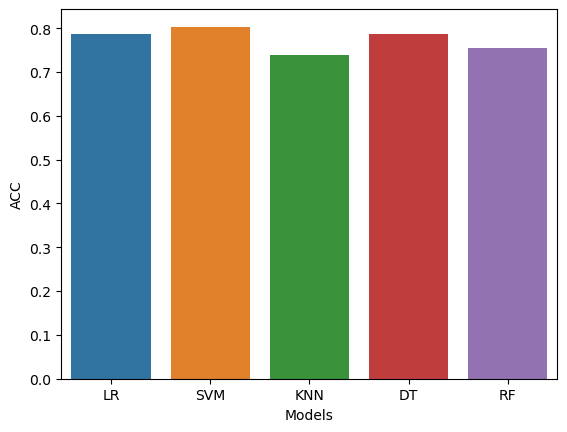

In [78]:
sns.barplot(x = final_data['Models'],y = final_data['ACC'])
plt.show()

### Prediction on New Data

In [83]:
data = pd.read_csv("heart.csv")

In [84]:
data = data.drop_duplicates()

In [85]:
x = data.drop('target',axis = 1)
y = data['target']

In [86]:
x.shape

(302, 13)

In [91]:
from sklearn import svm

In [92]:
svm = svm.SVC()
svm.fit(x,y)

SVC()

In [87]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3
},index=[0])

In [88]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


#### Prediction using Best fitted model

In [95]:
svm.predict(new_data)

array([1], dtype=int64)

### Save Model using Joblib

In [96]:
import joblib

In [97]:
joblib.dump(svm,'model_joblib_heart')

['model_joblib_heart']

In [98]:
model = joblib.load('model_joblib_heart')

In [99]:
model.predict(new_data)

array([1], dtype=int64)